In [ ]:
!wget http://factominer.free.fr/factomethods/datasets/decathlon.txt

In [ ]:
import pandas as pd

# charger les données
data = pd.read_csv('decathlon.txt', sep="\t")

# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# transformer les données en array numpy
X = my_data.values


In [54]:
my_data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4


In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class pca :
    def __init__(self,data):
        self.data=data


    def mean(self):
        return [1/(self.data.shape[0])* sum(self.data[:,k]) for k in range(self.data.shape[1]) ]


    def variance(self):
        variance = []
        for i in range(self.data.shape[1]):
            somme=0
            for j in range(self.data.shape[0]):
               
                somme=somme + (self.data[j][i]-self.mean()[i])**2
            somme /= self.data.shape[0]   
            variance.append(somme)
        return variance

    
    def transform(self ):    
        t=np.zeros((self.data.shape[0],self.data.shape[1]))    
        for i in range(self.data.shape[0]):
            for j in range(self.data.shape[1]):
                t[i][j] = (self.data[i][j]-self.mean()[j]) /(self.variance()[j] **0.5)

        return t

    def axe_principale(self):
        #La matrice des variances-covariances
        v= np.dot(self.transform().transpose(),self.transform())

        #valeurs propres
        valeurs_propres = np.linalg.eig(v)[0]
        vecteurs_propres = np.linalg.eig(v)[1]
        return vecteurs_propres

    def plot_(self  , columns):
        
        pcs = self.axe_principale()[: ,:]
      
        for i ,(x, y)  in enumerate(zip(pcs[:, 0], pcs[:, 1])):
            
            # Afficher un segment de l'origine au point (x, y)
            plt.plot([0, x], [0, y], color='k')
            # Afficher le nom (data.columns[i]) de la performance
            plt.text(x, y, columns[i], fontsize='14')

        plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

        # Afficher une ligne verticale x=0
        plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

        plt.xlim([-0.7, 0.7])
        plt.ylim([-0.7, 0.7])
        plt.show()

In [50]:
reducteur = pca(X)


In [51]:
columns= ['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle',
       'Discus', 'Pole.vault', 'Javeline', '1500m', 'Rank', 'Points',
       'Competition']

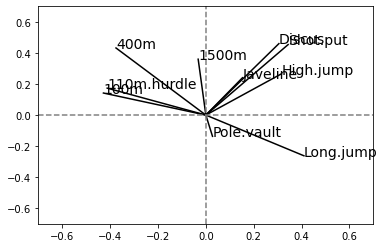

In [52]:
#X.shape
reducteur.plot_( columns)